In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')



In [2]:
dataset = np.array([[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]])

In [3]:
feature_1=dataset[:,0];
feature_2=dataset[:,1];
features = np.array(list(zip(feature_1, feature_2)))


# 1. A plot of the original dataset

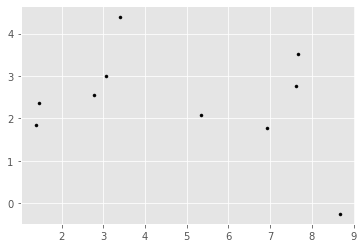

In [4]:
plt.scatter(feature_1, feature_2, c='black', s=9)

In [5]:
# Calculating  Distance  between two points
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:
# Number of clusters
k = 2

# X and Y coordinates of random centroids
C_x = np.random.randint(0, np.max(features), size=k)
C_y = np.random.randint(0, np.max(features), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)


# 2. Implementation of the k-mean clustering algorithm 

In [7]:
from copy import deepcopy

C_old = np.zeros(C.shape)
clusters = np.zeros(len(features))

# Calculating Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Minimizing till the error is zero
while error != 0:
   
    for i in range(len(features)):
        distances = dist(features[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)
    
    # Calculating the new centroids by taking the average value
    for i in range(k):
        points = [features[j] for j in range(len(features)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

# 3. Plot representing you clustering with the new centroids 

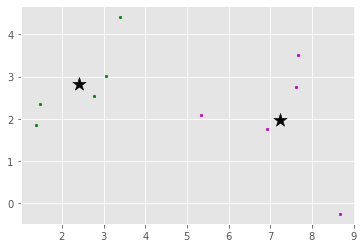

In [8]:
colors = ['m', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([features[j] for j in range(len(features)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# 4. Use sklearn to compute k-mean

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(features)
labels = kmeans.predict(features)

centroids_using_sklearn = kmeans.cluster_centers_
print(centroids_using_sklearn)

[[7.24634886 1.97708941]
 [2.41905543 2.83369638]]


# 5.  Plot representing the clusters obtained from sklearn with the new centroids

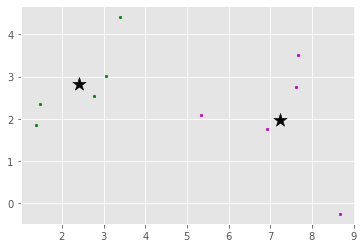

In [10]:
colors = ['m', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([features[j] for j in range(len(features)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids_using_sklearn[:, 0], centroids_using_sklearn[:, 1], marker='*', s=200, c='#050505')